In [122]:
import pandas as pd 
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
get_ipython().run_line_magic('matplotlib', 'inline')
from scipy import optimize
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, roc_curve ,average_precision_score, precision_recall_curve, precision_score, f1_score



In [97]:
df_diab = pd.read_csv("diabetes.csv")

In [98]:
df_diab.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [99]:
df_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [100]:
df_diab.shape

(768, 9)

In [101]:
df_diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [102]:
df_diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [103]:
df_diab.columns = df_diab.columns.str.lower()

In [104]:
df_diab.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [105]:
df_diab.shape

(768, 9)

In [106]:
df_diab.head(15)

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


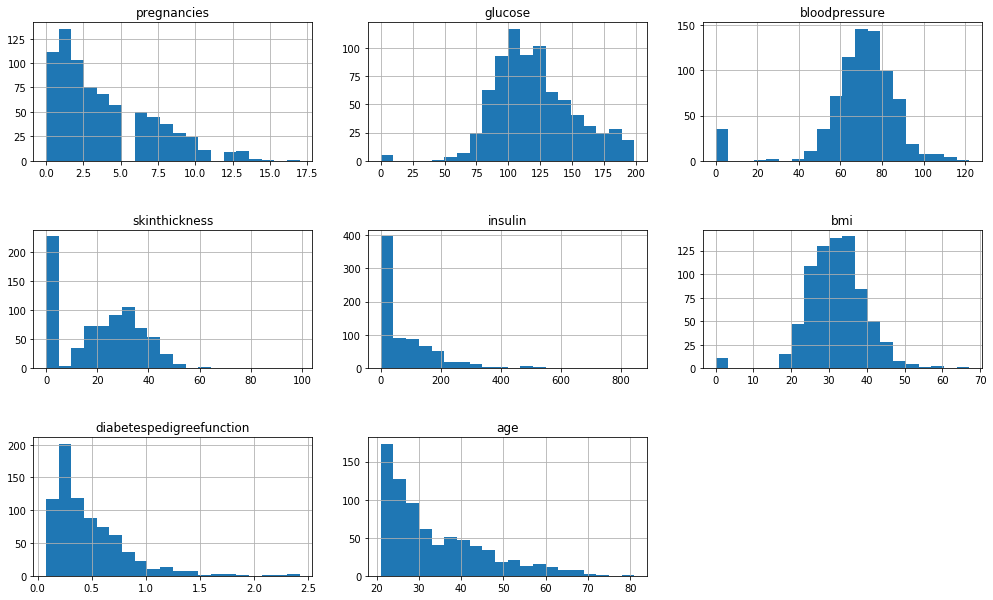

In [107]:
attributes=df_diab.columns[:8]
length=len(attributes)

plt.subplots(figsize=(17,14))
for i,j in itertools.zip_longest(attributes,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df_diab[i].hist(bins=20)
    plt.title(i)


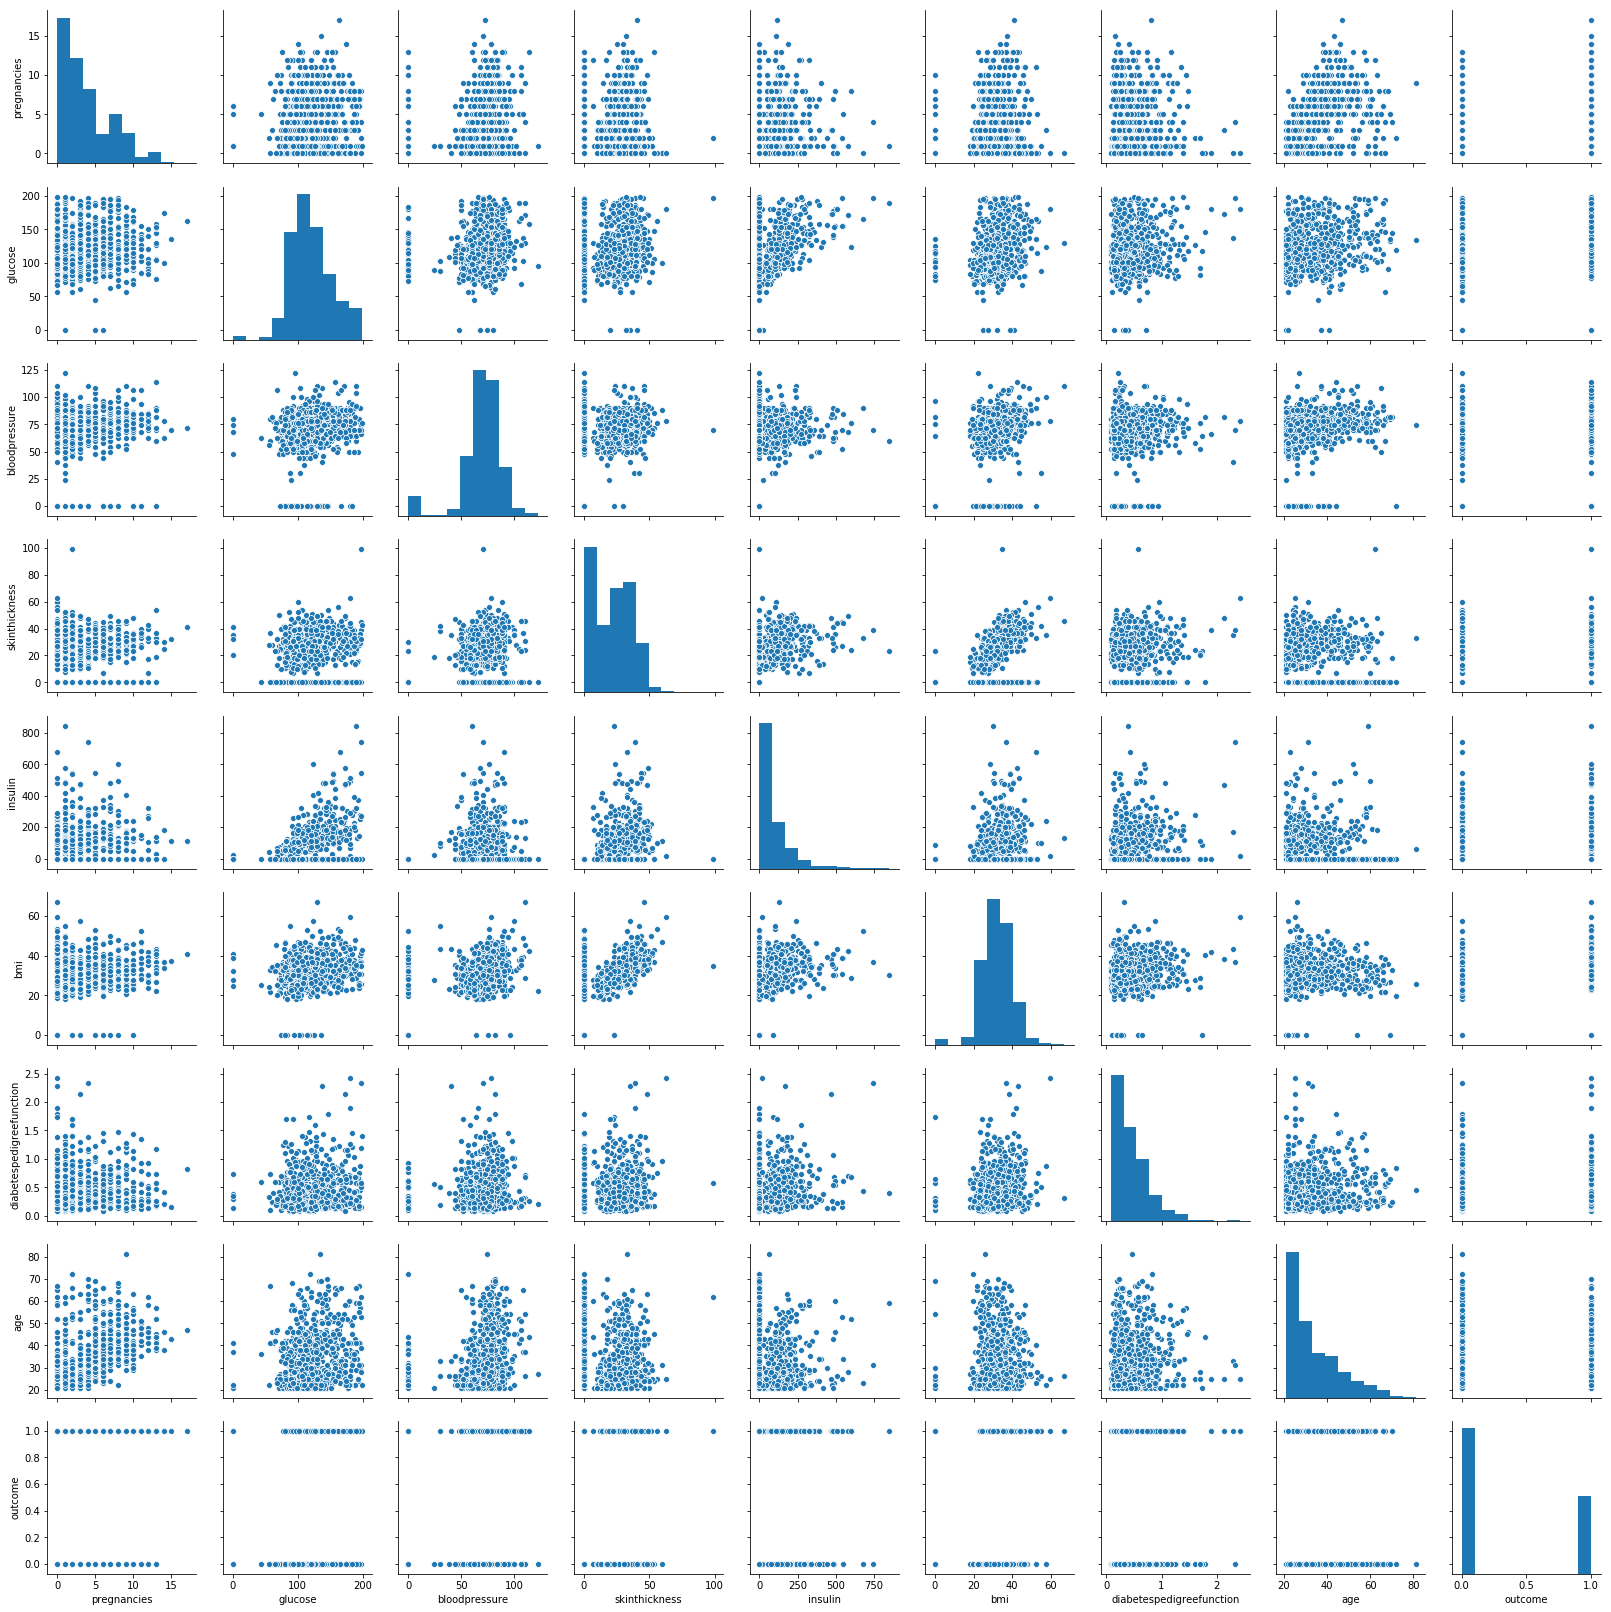

In [108]:
sns.pairplot(df_diab)

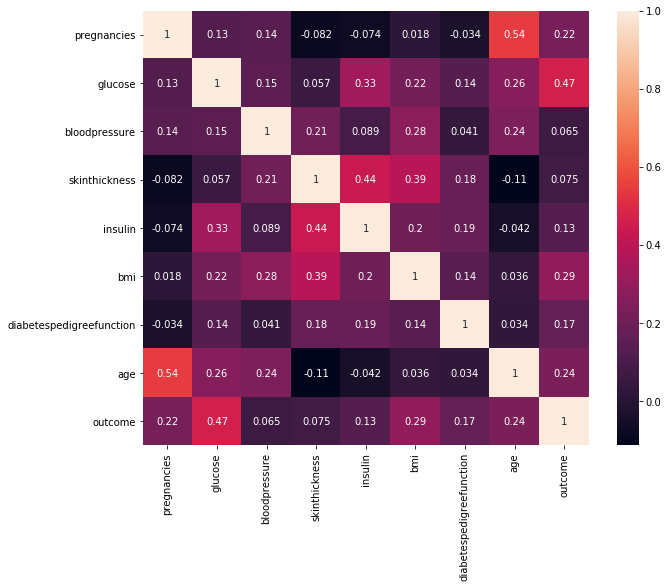

In [109]:
sns.heatmap(df_diab.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()


In [113]:
 # Calculate the median value for BMI
median_bmi = df_diab['bmi'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
df_diab['bmi'] = df_diab['bmi'].replace(
    to_replace=0, value=median_bmi)


In [114]:
# Calculate the median value for BloodPressure
median_bloodpressure = df_diab['bloodpressure'].median()
# Substitute it in the BloodP column of the
# dataset where values are 0
df_diab['bloodpressure'] = df_diab['bloodpressure'].replace(
    to_replace=0, value=median_bloodpressure)

In [115]:
# Calculate the median value for skinthickness
median_skinthickness = df_diab['skinthickness'].median()
# Substitute it in the BloodP column of the
# dataset where values are 0
df_diab['skinthickness'] = df_diab['skinthickness'].replace(
    to_replace=0, value=median_skinthickness)

In [116]:
# Calculate the median value for glucose
median_glucose = df_diab['glucose'].median()
# Substitute it in the BloodP column of the
# dataset where values are 0
df_diab['glucose'] = df_diab['glucose'].replace(
    to_replace=0, value=median_glucose)

In [117]:
# Calculate the median value for insulin
median_insulin = df_diab['insulin'].median()
# Substitute it in the BloodP column of the
# dataset where values are 0
df_diab['insulin'] = df_diab['insulin'].replace(
    to_replace=0, value=median_insulin)

In [127]:
from sklearn.model_selection import train_test_split

feature_col_names = ['pregnancies', 'glucose' , 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction', 'age']
predicted_class_names = ['outcome']

X = df_diab[feature_col_names].values # predictor feature coloumns ( 8 X m )
y = df_diab[predicted_class_names].values # predicted class ( 1= true , 0=false ) column ( 1 X m )
split_test_size = 0.30

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)
          # test size = 0.30 is 30% , 42 is the answer to everything , any number can be used for random state

In [131]:

print("{0:0.2f}% in training set".format((len(X_train)/len(df_diab.index))*100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df_diab.index))*100))

69.92% in training set
30.08% in test set


In [132]:
from sklearn.naive_bayes import GaussianNB

# Create Gaussian naive bayes model object and train it with the data 
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [133]:
# predict values using the Training data 
nb_predict_train = nb_model.predict(X_train)

# import the performance metrices library
from sklearn import metrics

# Accuracy
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy : 0.7561



In [135]:
# predict values using the Texting data 
nb_predict_text = nb_model.predict(X_test)

# import the performance metrices library
from sklearn import metrics

# Accuracy
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_text)))
print()

Accuracy : 0.7316



In [136]:
print("Confusion Matrix")

# the use of labels to set 1=True to upper left and 0=False to lower right

print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_text, labels = [1,0])))
print(" ")

print(" Classification Report ")
print(metrics.classification_report(y_test, nb_predict_text, labels = [1,0]))

Confusion Matrix
[[ 51  29]
 [ 33 118]]
 
 Classification Report 
              precision    recall  f1-score   support

           1       0.61      0.64      0.62        80
           0       0.80      0.78      0.79       151

   micro avg       0.73      0.73      0.73       231
   macro avg       0.70      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231



In [137]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42) # create random forest object
rf_model.fit(X_train, y_train.ravel())

C:\Users\balaj\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [138]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print()

Accuracy : 0.9832



In [139]:
rf_predict_test = rf_model.predict(X_test)
# training metrics
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))
print()

Accuracy : 0.7489



In [140]:
print("Confusion Matrix")

# the use of labels to set 1=True to upper left and 0=False to lower right

print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels = [1,0])))
print(" ")

print(" Classification Report ")
print(metrics.classification_report(y_test, rf_predict_test, labels = [1,0]))

Confusion Matrix
[[ 46  34]
 [ 24 127]]
 
 Classification Report 
              precision    recall  f1-score   support

           1       0.66      0.57      0.61        80
           0       0.79      0.84      0.81       151

   micro avg       0.75      0.75      0.75       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.75      0.74       231



In [141]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.7, random_state=42) # create random forest object
lr_model.fit(X_train, y_train.ravel())

C:\Users\balaj\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [142]:
lr_predict_test = lr_model.predict(X_test)
# training metrics
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print()

Accuracy : 0.7576



In [143]:
print("Confusion Matrix")

# the use of labels to set 1=True to upper left and 0=False to lower right

print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test, labels = [1,0])))
print(" ")

print(" Classification Report ")
print(metrics.classification_report(y_test, lr_predict_test, labels = [1,0]))

Confusion Matrix
[[ 44  36]
 [ 20 131]]
 
 Classification Report 
              precision    recall  f1-score   support

           1       0.69      0.55      0.61        80
           0       0.78      0.87      0.82       151

   micro avg       0.76      0.76      0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



In [145]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True, class_weight='balanced') 
lr_cv_model.fit(X_train, y_train.ravel())

C:\Users\balaj\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [146]:
lr_cv_predict_test = lr_cv_model.predict(X_test)
# training metrics
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print()

Accuracy : 0.6883



In [147]:
print("Confusion Matrix")

# the use of labels to set 1=True to upper left and 0=False to lower right

print("{0}".format(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels = [1,0])))
print(" ")

print(" Classification Report ")
print(metrics.classification_report(y_test, lr_cv_predict_test, labels = [1,0]))

Confusion Matrix
[[ 52  28]
 [ 44 107]]
 
 Classification Report 
              precision    recall  f1-score   support

           1       0.54      0.65      0.59        80
           0       0.79      0.71      0.75       151

   micro avg       0.69      0.69      0.69       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.71      0.69      0.69       231

